### Use yt clumpfind on snapshot 28

#### Note we have yet to tell yt what the "columns" in ramses output are.. esp. we need to read in f_H2. 

In [1]:
import yt

ds = yt.load("output/output_00028/info_00028.txt")

yt : [INFO     ] 2018-07-05 10:51:53,556 Parameters: current_time              = 3.17276944493
yt : [INFO     ] 2018-07-05 10:51:53,556 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-05 10:51:53,559 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-07-05 10:51:53,560 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-07-05 10:51:53,561 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-07-05 10:51:53,562 Parameters: current_redshift          = 5.99989573953
yt : [INFO     ] 2018-07-05 10:51:53,563 Parameters: omega_lambda              = 0.691999971867
yt : [INFO     ] 2018-07-05 10:51:53,563 Parameters: omega_matter              = 0.307999998331
yt : [INFO     ] 2018-07-05 10:51:53,564 Parameters: hubble_constant           = 0.677900009155


In [2]:
ds.density_unit

9.12671643381e-28 g/cm**3

In [3]:
Hmass_cgs = 1.673534E-24  # gram

In [4]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'mesh_id'),
 ('all', 'particle_age'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_identifier'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 

In [5]:
!cat output/output_00028/*csv

In [6]:
%matplotlib inline

In [7]:
import matplotlib
matplotlib.use('Agg')

slc = yt.SlicePlot(ds, 'z', 'density')
slc.show();

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/admin/anaconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/admin/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/admin/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 403, i

In [8]:
slc.save()

# [dataset name]_[plot type]_[axis]_[field name].[suffix]

yt : [INFO     ] 2018-07-05 10:52:13,188 Saving plot info_00028_Slice_z_density.png


['info_00028_Slice_z_density.png']

In [9]:
slc.save?

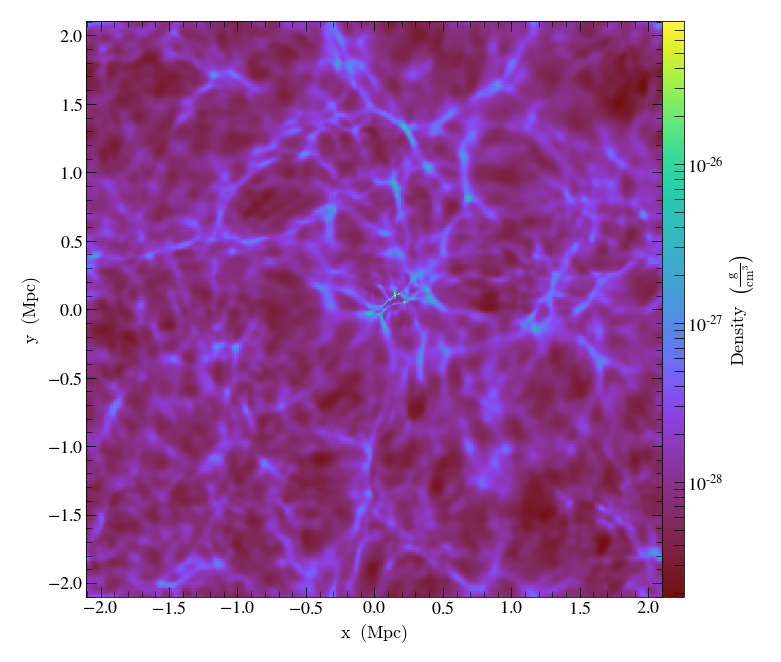

In [10]:
from IPython.display import Image
Image('info_00028_Slice_z_density.png')

In [11]:
print (ds.domain_width.in_units("Mpc"))

[ 4.20700432  4.20700432  4.20700432] Mpc


### Q: is yt showing the full box? 

Yes.

In [12]:
from yt.units import kpc

center = [0.53103, 0.51031000000000004, 0.50402000000000002]

distance = 0.00075
far_cut_depth = 0.00075
region_size = 0.0015

slc = yt.SlicePlot(ds, 'z', 'density', center=center, width=(2*region_size))

yt : [INFO     ] 2018-07-05 10:52:21,241 xlim = 0.529530 0.532530
yt : [INFO     ] 2018-07-05 10:52:21,242 ylim = 0.508810 0.511810
yt : [INFO     ] 2018-07-05 10:52:21,243 xlim = 0.529530 0.532530
yt : [INFO     ] 2018-07-05 10:52:21,244 ylim = 0.508810 0.511810
yt : [INFO     ] 2018-07-05 10:52:21,246 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


In [13]:
slc.save('info_00028_Slice_z_density_regsize0.0015.png')

yt : [INFO     ] 2018-07-05 10:52:22,819 Saving plot info_00028_Slice_z_density_regsize0.0015.png


['info_00028_Slice_z_density_regsize0.0015.png']

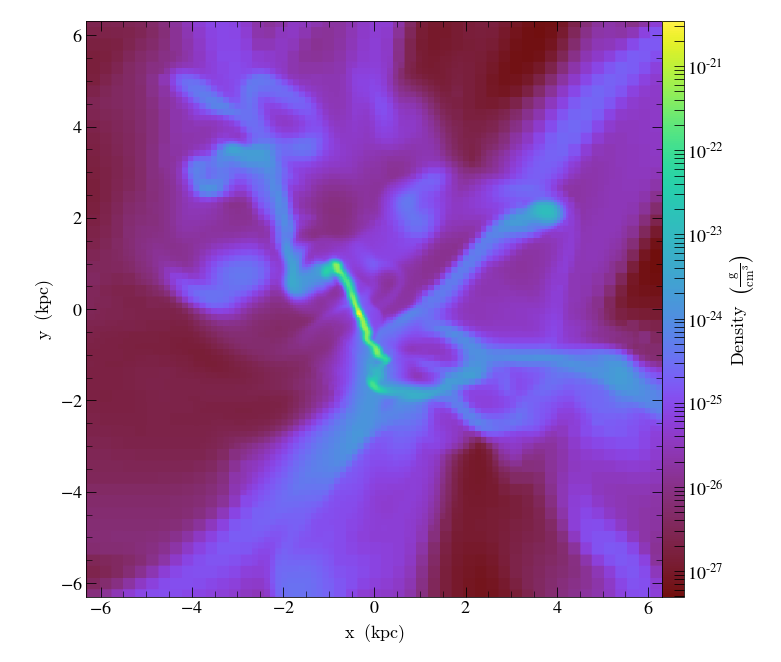

In [14]:
Image('info_00028_Slice_z_density_regsize0.0015.png')

### Q: why does this look so different from the density plot we looked at w/ pymses? Not because of the angle, since I also plotted that by viewing down from z-axis in read_00028.ipynb.

In [20]:
yt.SlicePlot?

### take a different up_vector (as defined in the .csv), off-axis projection

In [15]:
up_vector = [0.10255487134299716, 0.059509123032244614, 0.99294569974382518]
los = [0.85882976970482816, 0.49834986636750128, -0.11856996820546729]

cut = yt.SlicePlot(ds, fields='Density', normal=los, center=center, width=(2*region_size))
cut.save('info_00028_Slice_los_density_regsize0.0015.png')

yt : [INFO     ] 2018-07-05 10:52:31,603 xlim = -0.001500 0.001500
yt : [INFO     ] 2018-07-05 10:52:31,604 ylim = -0.001500 0.001500
yt : [INFO     ] 2018-07-05 10:52:31,605 Making a fixed resolution buffer of (('ramses', 'Density')) 800 by 800
yt : [INFO     ] 2018-07-05 10:52:34,029 Saving plot info_00028_Slice_los_density_regsize0.0015.png


['info_00028_Slice_los_density_regsize0.0015.png']

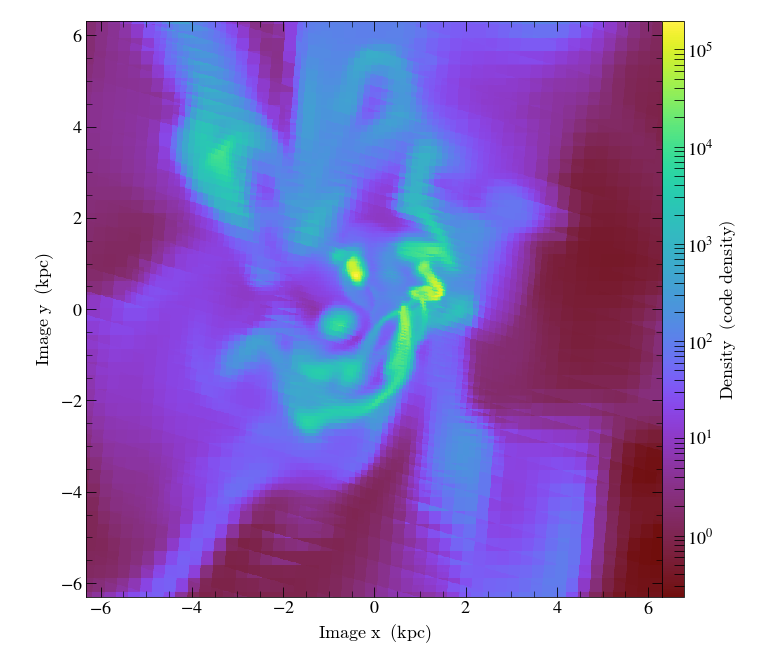

In [16]:
Image('info_00028_Slice_los_density_regsize0.0015.png')

In [23]:
cut.annotate_contour("Density")
# cut.save("info_00028_Slice_up_density_regsize0.0015_contour.png")

YTPlotCallbackError: annotate_contour callback failed with the following error: In initialize: Triangulation is invalid

### Off_axis_projection

In [ ]:
yt.off_axis_projection?
# ds, center, normal_vector, width, resolution, field

In [26]:
N = 256
image = yt.off_axis_projection(ds, center, los, [region_size, region_size, region_size], N, "Density")

KeyboardInterrupt: 

In [ ]:
import numpy as np

yt.write_image(np.log10(image), "%s_los_offaxis_projection.png" % ds)

In [ ]:
!ls -lrt *.png

In [ ]:
Image('info_00028_offaxis_projection.png')

### Q: trying to understand why does it look so different from pymses..

A: definition of normal vector in yt is likely the LOS vector...

In [28]:
# # this block takes forever to run, and may crash, skip...
# prj = yt.OffAxisProjectionPlot(ds, up_vector, 'Density',width=(2*region_size))
# prj.save('info_00028_offaxis_projection_annotated')
# Image('info_00028_offaxis_projection_annotated.png')

### Shift origin in SlicePlot()

By default, SlicePlot shifts the coordinates on the axes such that the origin is at the center of the slice. To instead use the coordinates as defined in the dataset, use the optional argument: origin="native". 

In our case, origin of the sim. is also at the center of the slice. 

yt : [INFO     ] 2018-07-04 16:06:20,745 xlim = 0.529530 0.532530
yt : [INFO     ] 2018-07-04 16:06:20,749 ylim = 0.508810 0.511810
yt : [INFO     ] 2018-07-04 16:06:20,753 xlim = 0.529530 0.532530
yt : [INFO     ] 2018-07-04 16:06:20,754 ylim = 0.508810 0.511810
yt : [INFO     ] 2018-07-04 16:06:20,764 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2018-07-04 16:06:46,632 Saving plot info_00028_Slice_z_density_regsize0.0015_nativeSimOrigin.png


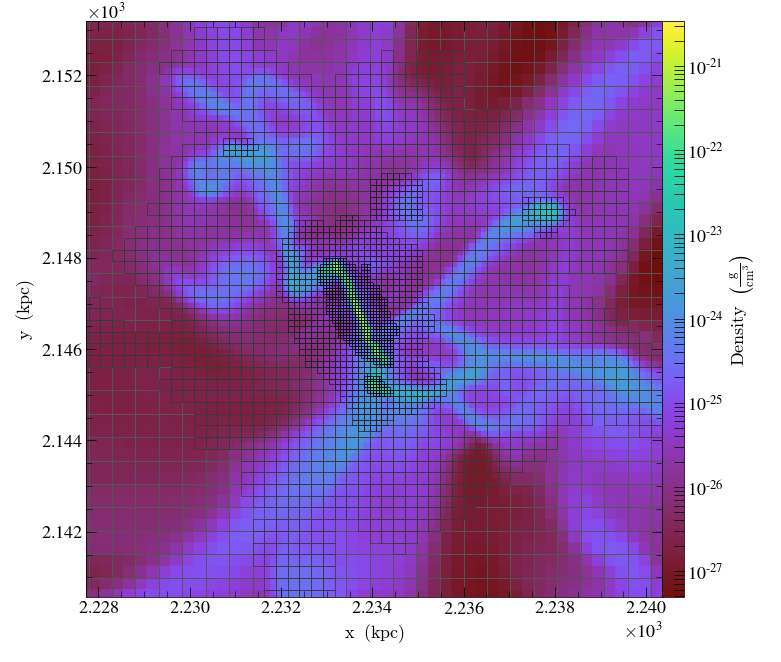

In [29]:
slc = yt.SlicePlot(ds, 'z', 'density', center=center, width=(2*region_size), origin="native")  
slc.annotate_grids()
slc.save('info_00028_Slice_z_density_regsize0.0015_nativeSimOrigin.png')
Image('info_00028_Slice_z_density_regsize0.0015_nativeSimOrigin.png')

In [31]:
slc.save??

In [30]:
ds.field_list

[('all', 'particle_age'),
 ('all', 'particle_identifier'),
 ('all', 'particle_mass'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_refinement_level'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('io', 'particle_age'),
 ('io', 'particle_identifier'),
 ('io', 'particle_mass'),
 ('io', 'particle_metallicity'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_refinement_level'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z'),
 ('ramses', 'Density'),
 ('ramses', 'Metallicity'),
 ('ramses', 'Pressure'),
 ('ramses', 'var12'),
 ('ramses', 'var13'),
 ('ramses', 'var14'),
 ('ramses', 'var15'),
 ('ramses', 'var16'),
 ('ramses', 'x-Bfield-left'),
 ('ramses', 'x-Bfield-right'),
 ('ramses', 'x-velocity'),
 ('ramses', 'y-Bfield-

In [31]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'mesh_id'),
 ('all', 'particle_age'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_identifier'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 

In [32]:
print(ds.field_info["ramses", "Density"].get_source())

def NullFunc(field, data):
    raise YTFieldNotFound(field.name)



In [33]:
ds.field_info["ramses", "Density"]

On-Disk Field (ramses, Density): (units: code_density)

yt : [INFO     ] 2018-07-04 16:06:54,927 xlim = 0.529530 0.532530
yt : [INFO     ] 2018-07-04 16:06:54,928 ylim = 0.508810 0.511810
yt : [INFO     ] 2018-07-04 16:06:54,931 xlim = 0.529530 0.532530
yt : [INFO     ] 2018-07-04 16:06:54,932 ylim = 0.508810 0.511810
yt : [INFO     ] 2018-07-04 16:06:54,936 Making a fixed resolution buffer of (('ramses', 'Density')) 800 by 800
yt : [INFO     ] 2018-07-04 16:06:55,748 Saving plot info_00028_Slice_z_Density_regsize0.0015.png


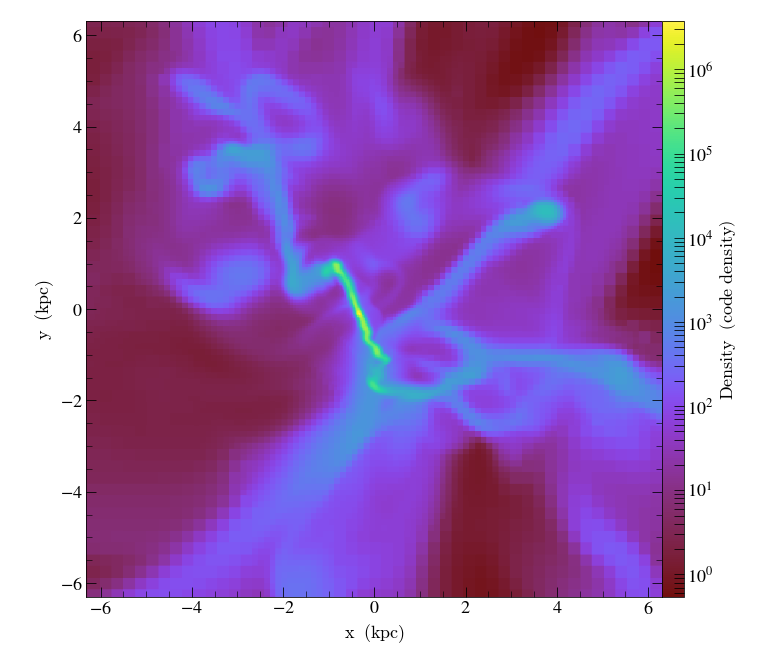

In [34]:
slc = yt.SlicePlot(ds, 'z', 'Density', center=center, width=(2*region_size))
# slc.annotate_grids()
slc.save('info_00028_Slice_z_Density_regsize0.0015.png')
Image('info_00028_Slice_z_Density_regsize0.0015.png')

# properly load in all the fields..

In [20]:
_ds = yt.load("output/output_00028/info_00028.txt", \
          fields = ["Density","x-velocity", "y-velocity", "z-velocity", "Pressure_nt", \
                    "Pressure", "Z", "ref", "H", "E", "H+", "HE", "HE+", "HE++", "H-", "H2", "H2+"])

yt : [INFO     ] 2018-07-05 13:38:47,043 Parameters: current_time              = 3.17276944493
yt : [INFO     ] 2018-07-05 13:38:47,044 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-05 13:38:47,045 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-07-05 13:38:47,047 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-07-05 13:38:47,048 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-07-05 13:38:47,049 Parameters: current_redshift          = 5.99989573953
yt : [INFO     ] 2018-07-05 13:38:47,049 Parameters: omega_lambda              = 0.691999971867
yt : [INFO     ] 2018-07-05 13:38:47,050 Parameters: omega_matter              = 0.307999998331
yt : [INFO     ] 2018-07-05 13:38:47,051 Parameters: hubble_constant           = 0.677900009155


In [21]:
ds.field_list

[('all', 'particle_age'),
 ('all', 'particle_identifier'),
 ('all', 'particle_mass'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_refinement_level'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('io', 'particle_age'),
 ('io', 'particle_identifier'),
 ('io', 'particle_mass'),
 ('io', 'particle_metallicity'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_refinement_level'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z'),
 ('ramses', 'Density'),
 ('ramses', 'Metallicity'),
 ('ramses', 'Pressure'),
 ('ramses', 'var12'),
 ('ramses', 'var13'),
 ('ramses', 'var14'),
 ('ramses', 'var15'),
 ('ramses', 'var16'),
 ('ramses', 'x-Bfield-left'),
 ('ramses', 'x-Bfield-right'),
 ('ramses', 'x-velocity'),
 ('ramses', 'y-Bfield-

In [22]:
_ds.field_list

[('all', 'particle_age'),
 ('all', 'particle_identifier'),
 ('all', 'particle_mass'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_refinement_level'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('io', 'particle_age'),
 ('io', 'particle_identifier'),
 ('io', 'particle_mass'),
 ('io', 'particle_metallicity'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_refinement_level'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z'),
 ('ramses', 'Density'),
 ('ramses', 'E'),
 ('ramses', 'H'),
 ('ramses', 'H+'),
 ('ramses', 'H-'),
 ('ramses', 'H2'),
 ('ramses', 'H2+'),
 ('ramses', 'HE'),
 ('ramses', 'HE+'),
 ('ramses', 'HE++'),
 ('ramses', 'Pressure'),
 ('ramses', 'Pressure_nt'),
 ('ramses', 'Z'),
 ('ramses', 'ref'),
 ('ramses

In [23]:
slc = yt.SlicePlot(_ds, 'z', 'density')
slc.show();

yt : [INFO     ] 2018-07-05 13:39:08,212 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-07-05 13:39:08,212 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-07-05 13:39:08,215 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-07-05 13:39:08,215 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-07-05 13:39:08,219 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


In [24]:
slc.save('_ds_z_density.png')

yt : [INFO     ] 2018-07-05 13:39:10,378 Saving plot _ds_z_density.png


['_ds_z_density.png']

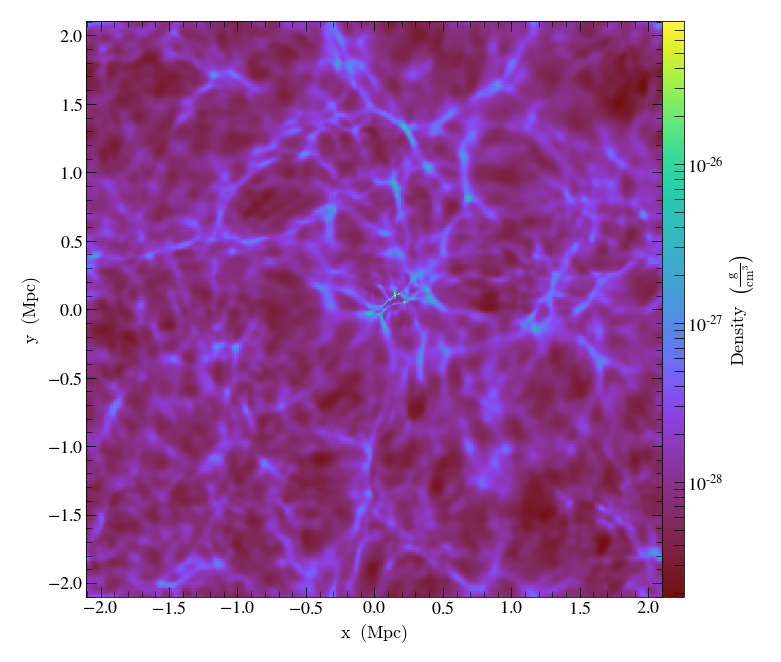

In [25]:
Image('_ds_z_density.png')

### Q: okay, this looks weird.. 
A: this was fixed, after we included the "ref field" in field #7, which we previously skipped because it contains structure of the AMR, and we didn't care.